In [1]:
import sys
sys.path.insert(0, './utils/')
import feature_selection as fs
import classification_models as cm

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
import pickle
import pandas as pd

In [3]:
import importlib
importlib.reload(cm)
importlib.reload(fs)

<module 'feature_selection' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\feature_selection.py'>

In [62]:
import classification_models2 as cm2

In [63]:
importlib.reload(cm2)

<module 'classification_models2' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\classification_models2.py'>

In [24]:
processed_data_filename = 'processed_data_20230511_225808.pickle'
processed_data_path = f'./data/{processed_data_filename}'

df = pd.read_pickle(processed_data_path)

In [25]:
df.shape

(876170, 115)

In [26]:
df.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,verification_status_Verified,verification_status_nan,pymnt_plan_y,pymnt_plan_nan,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_nan,initial_list_status_w,initial_list_status_nan,label
0,-1.203909,-0.616915,-1.301341,1.217976,-0.453552,0.381301,-0.093288,-0.013627,-1.400648,-0.424777,...,1.430559,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,0
1,-1.377846,0.516883,-1.241445,-1.641569,-0.453552,2.633161,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,1
2,-1.377846,0.686216,-1.301341,-1.194287,-0.453552,1.507231,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,0
3,-0.582706,0.080052,-0.666436,0.243131,-0.453552,0.381301,0.191932,-0.013627,-0.300568,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,0
4,-1.377846,-0.116277,0.255973,-0.019376,-0.453552,-0.744628,0.405847,-0.013627,0.799513,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,-0.637121,-0.965898,0.0,0


In [27]:
df.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec',
       ...
       'verification_status_Verified', 'verification_status_nan',
       'pymnt_plan_y', 'pymnt_plan_nan', 'next_pymnt_d_Jan-2016',
       'next_pymnt_d_Mar-2016', 'next_pymnt_d_nan', 'initial_list_status_w',
       'initial_list_status_nan', 'label'],
      dtype='object', length=115)

In [28]:
# Perform feature selection

top_n_features = fs.select_features(X = df.drop(columns = ['label']), 
                   y = df['label'], 
                   ml_type = 'classification',
                   n_features_to_select = 30,                 
                   n_samples = 100000)

INFO:root:Starting feature selection...
INFO:root:Feature selection completed in 932.75 seconds


In [29]:
top_n_features 

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_less_than_1_year',
 'emp_length_nan',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'purp

In [30]:
df.shape

(876170, 115)

In [74]:
# Randomly sample n_samples from your DataFrame
n_samples = 20000

df_sampled = df.sample(n_samples, random_state=42)

In [75]:
X_processed_sampled = df_sampled[top_n_features]
y_sampled = df_sampled['label']

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 0.50 seconds)
KNN: Done (Execution Time: 0.03 seconds)
SVM: Done (Execution Time: 291.06 seconds)
Random Forest: Done (Execution Time: 8.16 seconds)
XGBoost: Done (Execution Time: 3.88 seconds)


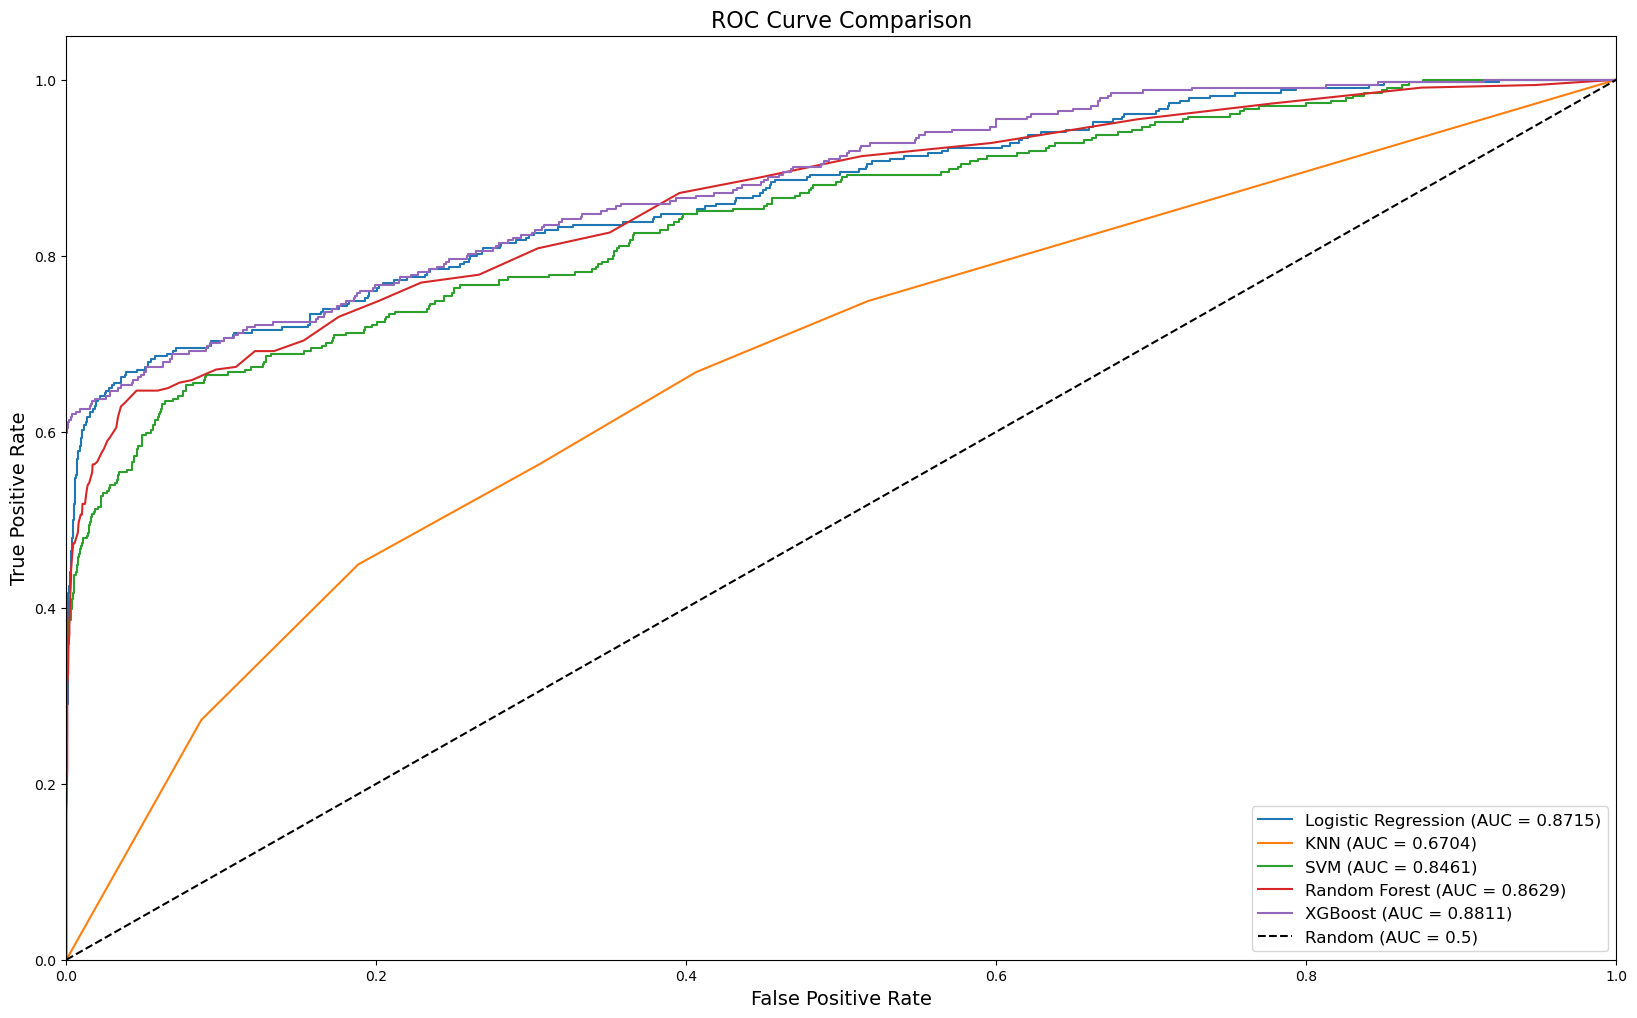

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression   0.89825   0.432030  0.694611  0.532721  0.871465
1                  KNN   0.68400   0.143951  0.562874  0.229268  0.670417
2                  SVM   0.93025   0.587302  0.553892  0.570108  0.846059
3        Random Forest   0.95075   0.851282  0.497006  0.627599  0.862914
4              XGBoost   0.96625   0.985366  0.604790  0.749536  0.881147

Best Performing Model:

Model         XGBoost
Accuracy      0.96625
Precision    0.985366
Recall        0.60479
F1 Score     0.749536
ROC AUC      0.881147
Name: 4, dtype: object

Best Performing Model:

Model         XGBoost
Accuracy      0.96625
Precision    0.985366
Recall        0.60479
F1 Score     0.749536
ROC AUC      0.881147
Name: 4, dtype: object

Saved best model (XGBoost) to a pickle file.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [76]:
cm2.run_classification_models(X_processed_sampled, y_sampled, search_type = None)